In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

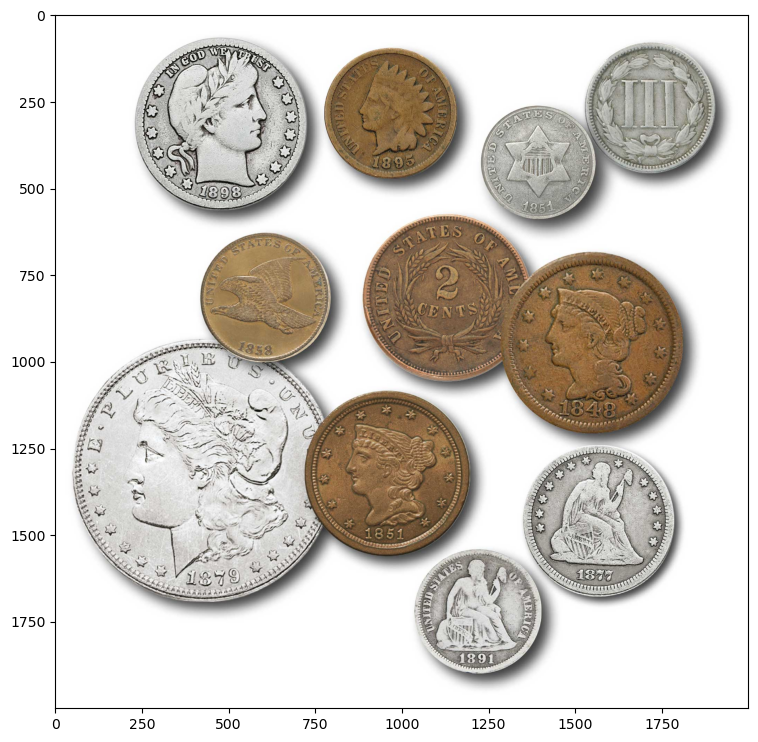

In [65]:
img_norm = cv2.imread("C:\\Users\\thainguyen5484\\Downloads\\cubic.jpg")
img_norm = img_norm[:,:,::-1]
img=cv2.cvtColor(img_norm,cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(16,9))
plt.imshow(img_norm,cmap="gray")

In [3]:
# Rectangular Kernel 3x3
ker_1=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
# Rectangular Kernel 5x5
ker_11=cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
# Rectangular Kernel 7x7
ker_12=cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))

# Elliptical Kernel 3x3
ker_2=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
# Elliptical Kernel 5x5
ker_21=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
# Elliptical Kernel 7x7
ker_22=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))


# Cross-shaped Kernel 3x3
ker_3=cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# Cross-shaped Kernel 5x5
ker_31=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
# Cross-shaped Kernel 7x7
ker_32=cv2.getStructuringElement(cv2.MORPH_CROSS,(7,7))

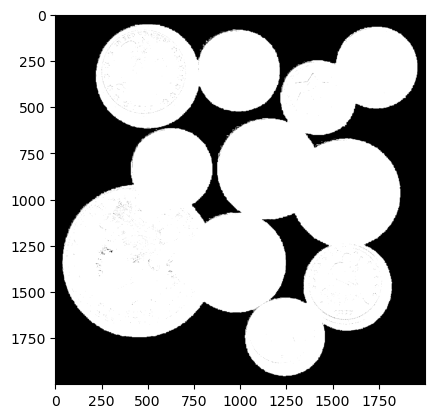

In [7]:
ret,img_bin = cv2.threshold(img,253,255,cv2.THRESH_BINARY_INV)
plt.imshow(img_bin,cmap="gray")

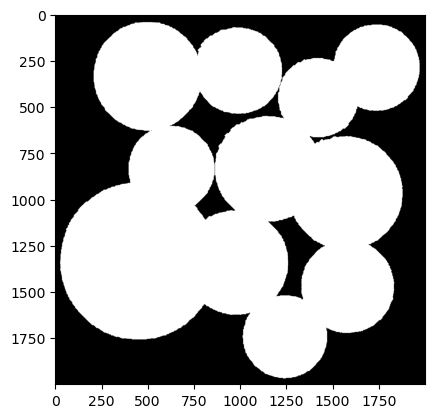

In [67]:


img_total=cv2.morphologyEx(img_bin,cv2.MORPH_CLOSE,ker_32)
img_total=cv2.morphologyEx(img_total,cv2.MORPH_CLOSE,ker_32)
img_total=cv2.dilate(img_total,ker_32,10)
img_total=cv2.dilate(img_total,ker_32,10)
img_total=cv2.dilate(img_total,ker_32,10)
img_total=cv2.dilate(img_total,ker_32,10)
plt.imshow(img_total,cmap="gray")

In [5]:
contours, hierarchy=cv2.findContours(img_bin,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
contours1, hierarchy1=cv2.findContours(img_bin,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

(-0.5, 1999.5, 1999.5, -0.5)

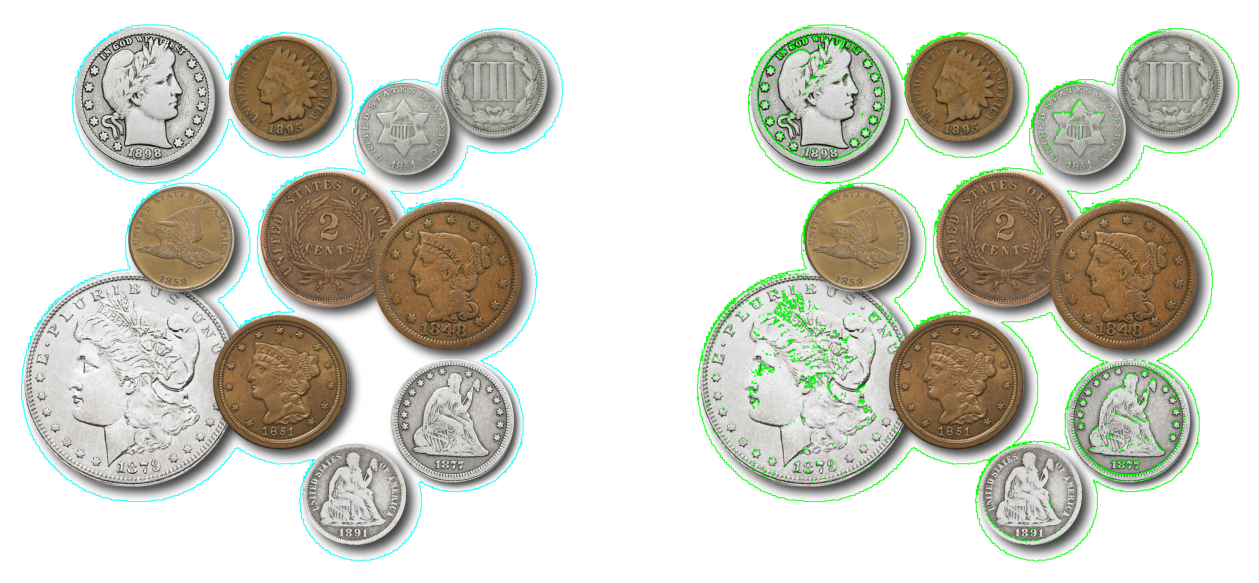

In [6]:
img_con=cv2.drawContours(img_norm.copy(), contours, -1, (0, 255,255), 2)
img_con1=cv2.drawContours(img_norm.copy(), contours1, -1, (0, 255, 0), 2)
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.imshow(img_con)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(img_con1)
plt.axis("off")

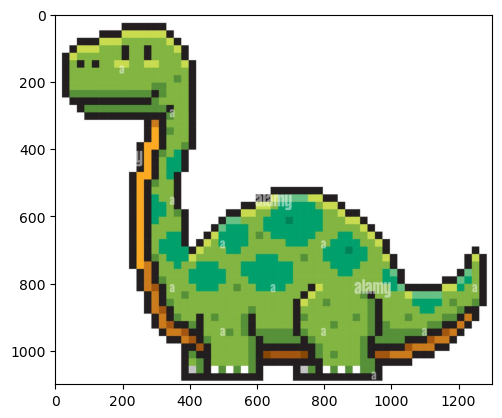

In [56]:
dino=cv2.imread("C:\\Users\\thainguyen5484\\Downloads\\dinosaur.jpg")

dino=dino[:1100,:]
dino=dino[:,:,::-1]
dino_gray=cv2.cvtColor(dino,cv2.COLOR_RGB2GRAY)
plt.imshow(dino)

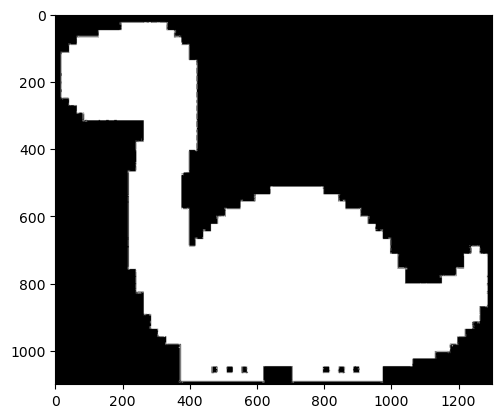

In [57]:
ret,dino_thr=cv2.threshold(dino_gray,252,255,cv2.THRESH_BINARY_INV)
plt.imshow(dino_thr,cmap="gray")

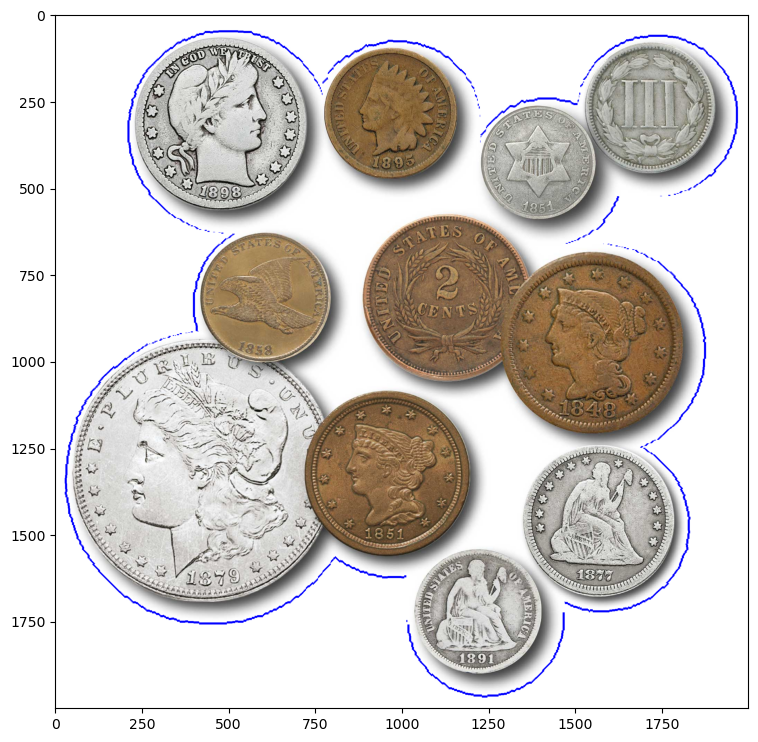

In [63]:
def retr_external_mode(img):
    X_cor=[]
    x_temp=[]
    Y_cor=[]
    ##X
    m,n = img.shape
    for i in range(m):
        x_temp=[]
        for j in range(n):
            if(img[i,j]==255):
                x_temp.append([i,j])
        if len(x_temp)!=0:
            X_cor.append(x_temp[0])
            X_cor.append(x_temp[-1])
        if len(x_temp)>4:
            X_cor.append(x_temp[1])
            X_cor.append(x_temp[2])
            X_cor.append(x_temp[-3])
            X_cor.append(x_temp[-2])
        if len(x_temp)>8:
            X_cor.append(x_temp[3])
            X_cor.append(x_temp[4])
            X_cor.append(x_temp[5])
            X_cor.append(x_temp[-6])
            X_cor.append(x_temp[-5])
            X_cor.append(x_temp[-4])
    ##Y
    for i in range(n):
        x_temp=[]
        for j in range(m):
            if(img[j,i]==255):
                x_temp.append([j,i])
        if len(x_temp)!=0:
            Y_cor.append(x_temp[0])
            Y_cor.append(x_temp[-1])
        if len(x_temp)>4:
            Y_cor.append(x_temp[1])
            Y_cor.append(x_temp[2])
            Y_cor.append(x_temp[-3])
            Y_cor.append(x_temp[-2])
        if len(x_temp)>8:
            Y_cor.append(x_temp[3])
            Y_cor.append(x_temp[4])
            Y_cor.append(x_temp[5])
            Y_cor.append(x_temp[-6])
            Y_cor.append(x_temp[-5])
            Y_cor.append(x_temp[-4])           
    return X_cor,Y_cor
def draw_contour(img,color,img_bin):
    left,right=retr_external_mode(img_bin)
    img_temp=np.copy(img)
    for x in left:
        img_temp[x[0],x[1]]=color
    for y in right:
        img_temp[y[0],y[1]]=color
    return img_temp

img_new=draw_contour(img_norm,[0,0,255],img_total)
plt.figure(figsize=(16,9))
plt.imshow(img_new)
plt.show()

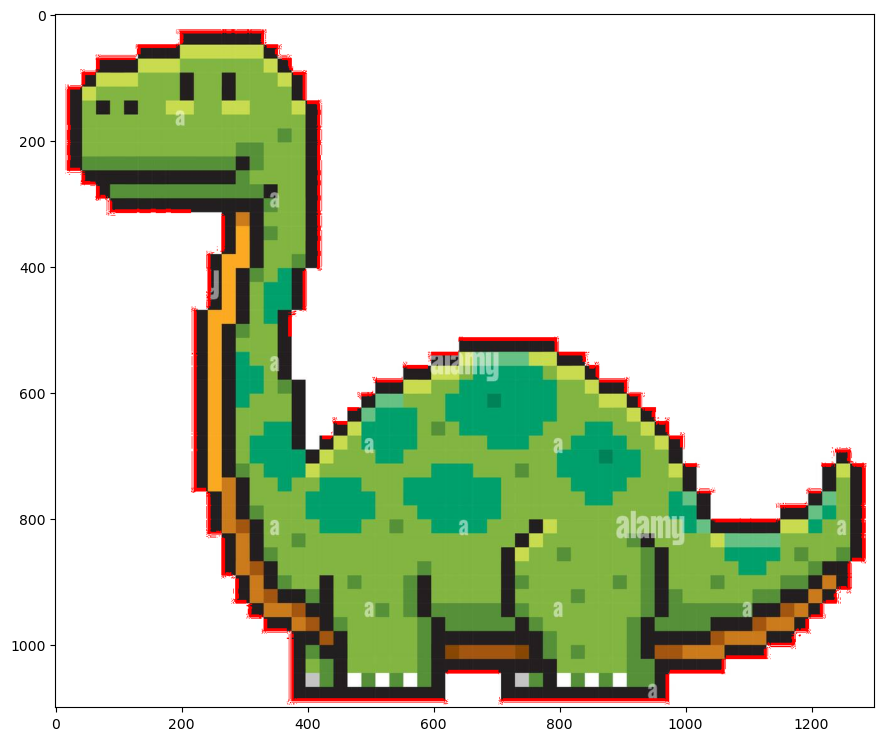

In [64]:
img_new=draw_contour(dino,[255,0,0],dino_thr)
plt.figure(figsize=(16,9))
plt.imshow(img_new)
plt.show()